# Experiments on a basic neural network

We will setup a one layer linear network for regression.

In [372]:
import os
import sys

sys.path.append(os.path.join(os.getcwd(), ".."))

In [373]:
from pyldl.losses import MSELoss
from pyldl.modules import Linear

## Dataset and Network

In [374]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, n_features=1, noise=1)
y = y.reshape(-1, 1)

In [375]:
in_features = X.shape[1]
out_features = 1

network = Linear(in_features, out_features)
loss = MSELoss()

In [376]:
in_features = X.shape[1]
out_features = 1

network = Linear(in_features, out_features)
loss = MSELoss()

## Gradient Descent

In [377]:
def gradient_descent(X, y, n_iter=500, gradient_step=1e-5, eps=1e-10):
    losses = []
    for _ in range(n_iter):
        yhat = network.forward(X)
        losses.append(loss.forward(y, yhat).mean())
        delta = loss.backward(y, yhat)
        network.backward_update_gradient(X, delta)
        w, b = network._parameters, network._bias
        network.update_parameters(gradient_step)
        network.zero_grad()
    return losses

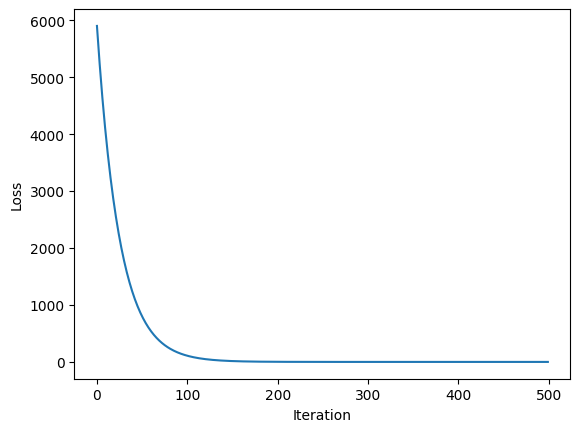

In [378]:
import matplotlib.pyplot as plt

losses = gradient_descent(X, y)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

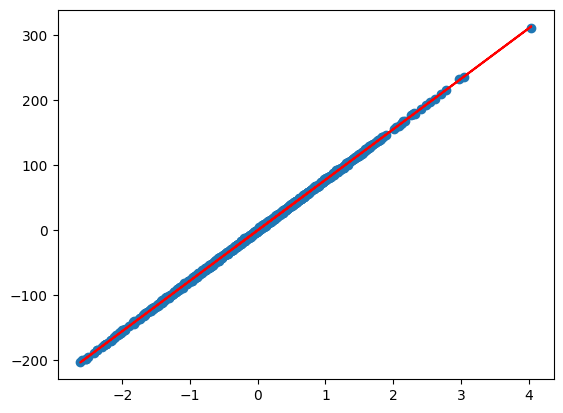

In [379]:
yhat = network.forward(X)
plt.scatter(X, y)
plt.plot(X, yhat, color="red")
plt.show()